# Ratings Prediction Price

### Ratings Predifction Price

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

# First let us import the libraries

In [1]:
#Importing libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# Importing dataset file using pandas.
data=pd.read_csv("Ratings_scraped.csv") 

In [3]:
data.head()

,Rattings,Review
0,1,Please don't purchase any Lenovo product.4 mon...
1,1,Please don't purchase any Lenovo product.4 mon...
2,1,Please don't purchase any Lenovo product.4 mon...
3,4,the laptop whole package is awesome. although ...
4,4,"Pros:Good specs, others have written enough ab..."


In [4]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
data.head()

No. of Rows : 42080
No. of Columns : 2


,Rattings,Review
0,1,Please don't purchase any Lenovo product.4 mon...
1,1,Please don't purchase any Lenovo product.4 mon...
2,1,Please don't purchase any Lenovo product.4 mon...
3,4,the laptop whole package is awesome. although ...
4,4,"Pros:Good specs, others have written enough ab..."


# Exploratory Data Analysis (EDA)

In [5]:
data.columns

Index(['Rattings', 'Review'], dtype='object')

In [6]:
data.shape

(42080, 2)

In [7]:
#Checking the datatype of all the columns present
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42080 entries, 0 to 42079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  42080 non-null  int64 
 1   Review    42064 non-null  object
dtypes: int64(1), object(1)
memory usage: 657.6+ KB


In [8]:
# Let us check the datatypes of all the columns:
data.dtypes

Rattings     int64
Review      object
dtype: object

### Checking Null values

In [9]:
data.isnull().sum()

Rattings     0
Review      16
dtype: int64

- We can see that review column has 16 missing values in it.

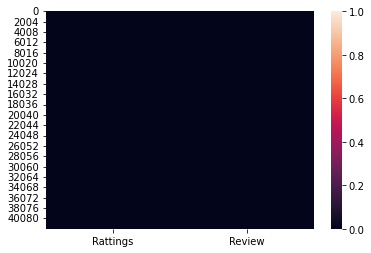

In [10]:
# Lets check missing values using heatmap
sns.heatmap(data.isnull())
plt.show()

### We will replace missing value in Review with 'Review Not Available'

In [11]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
data['Review'].fillna('Review Not Available',inplace=True)
data.isnull().sum().any()  #Checking after filling them

False

No missing values are present now.

In [12]:
data['Rattings'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        4
4        4
        ..
42075    5
42076    2
42077    4
42078    4
42079    1
Name: Rattings, Length: 42080, dtype: int64>

### Unique Values

In [13]:
data.nunique()

Rattings       5
Review      3615
dtype: int64

In [14]:
# Lets check value counts
for columns in data:
    print(columns)
    print(data[columns].value_counts())
    print("="*120)

Rattings
4    28024
5     9494
3     2560
1     1554
2      448
Name: Rattings, dtype: int64
Review
Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1229
Nice                                                                                                                                                                                                                                                                                                                                                                                               

# Data Visualization

### Countplot and Piechart

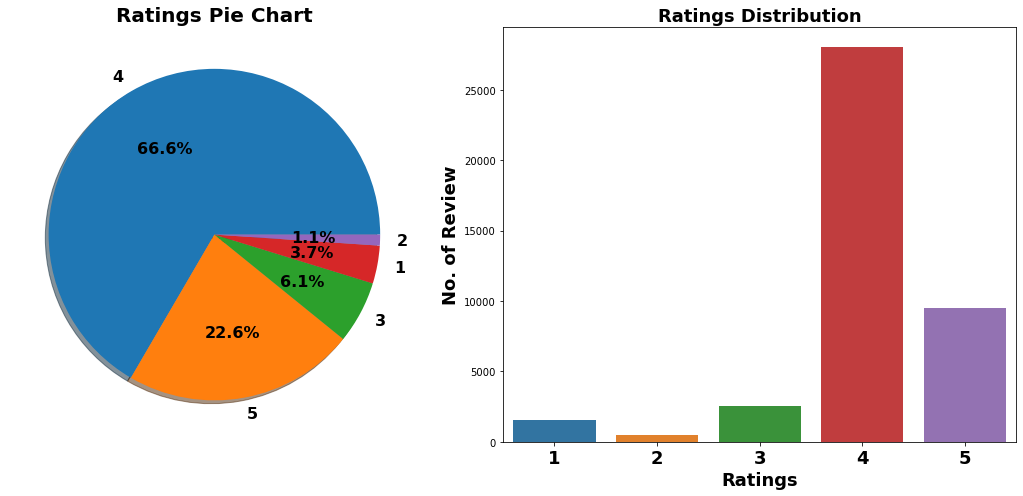

Value Counts of Rating:


4    28024
5     9494
3     2560
1     1554
2      448
Name: Rattings, dtype: int64

In [15]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(15,7))
data['Rattings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Rattings',data=data,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
data['Rattings'].value_counts()

In [16]:
# Average Rating given by user
print("Average rating given by users is " + str(data['Rattings'].mean()))

Average rating given by users is 4.032699619771863


### Observation :
1. Around 58% customer gave 4-star rating followed by 27% customer gave 5-star rating.

2. Average Rating is 4.0.

# Text Mining


### Operation perform are as followed:

- Removing Punctuations and other special characters

- Word Tokenzation

- Removing Stop Words

- Stemming and Lemmatising

- Applying Count Vectoriser

In [17]:
#Importing required libraries
import re 
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

- Applying Regular expression for text extraction.

In [19]:
def clean_text(data, data_column_name):
    
    #Converting all messages to lowercase
    data[data_column_name] = data[data_column_name].str.lower()

    #Replace email addresses with 'email'
    data[data_column_name] = data[data_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    data[data_column_name] = data[data_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    data[data_column_name] = data[data_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    data[data_column_name] = data[data_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    data[data_column_name] = data[data_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    data[data_column_name] = data[data_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    data[data_column_name] = data[data_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    data[data_column_name] = data[data_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data[data_column_name] = data[data_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [20]:
#Calling the class
clean_text(data, 'Review')
data['Review'].sample(10)

41394    sales support think think else good however fe...
34462    almost numbr months deciding whether buy monit...
17188    purchased numbr features included value money ...
3833     got numbr numbrgb model numbr portrait mode nu...
28223    good value money smart watch reputed global br...
12388    disappointed camera performancebut sections be...
21438    like build quality almost best battery backup ...
8222     battery v good sound good camera also good goo...
29382    watch first smart watchhappy buy wearing looki...
537      bought numbrmonth ago short period laptop dead...
Name: Review, dtype: object

# Data Tokenization using RegexpTokenizer

In [21]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
data['Review'] = data['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
data.head()

,Rattings,Review
0,1,"[please, purchase, lenovo, product, numbr, mon..."
1,1,"[please, purchase, lenovo, product, numbr, mon..."
2,1,"[please, purchase, lenovo, product, numbr, mon..."
3,4,"[laptop, whole, package, awesome, although, bi..."
4,4,"[pros, good, specs, others, written, enough, r..."


# Stemming & Lemmatization

In [22]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [23]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))     
    return result

In [24]:
#Processing review with above Function
processed_review = []

for doc in data.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

42080


[['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product']]

In [25]:
data['clean_review']=processed_review  #Assigning this to the dataframe
data.head()

,Rattings,Review,clean_review
0,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
1,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
2,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
3,4,"[laptop, whole, package, awesome, although, bi...","[laptop, whole, packag, awesom, although, bite..."
4,4,"[pros, good, specs, others, written, enough, r...","[pros, good, spec, other, write, enough, repea..."


In [26]:
data['Review'] = data['clean_review'].apply(lambda x:' '.join(y for y in x))
data.head()

,Rattings,Review,clean_review
0,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
1,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
2,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
3,4,laptop whole packag awesom although bite price...,"[laptop, whole, packag, awesom, although, bite..."
4,4,pros good spec other write enough repeat work ...,"[pros, good, spec, other, write, enough, repea..."


# Plotting wordcloud for different ratings

Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. The more commonly the term appears within the text being analysed, the larger the word appears in the image generated. The enlarged texts are the most number of words used there and small texts are the less number of words used.

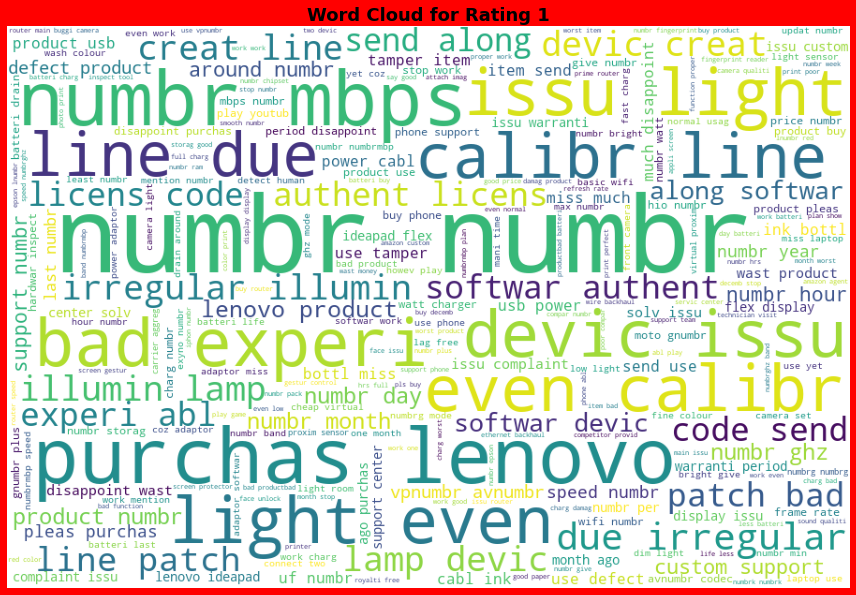

In [27]:
#Getting sense of words in Rating 1
one = data['Review'][data['Rattings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

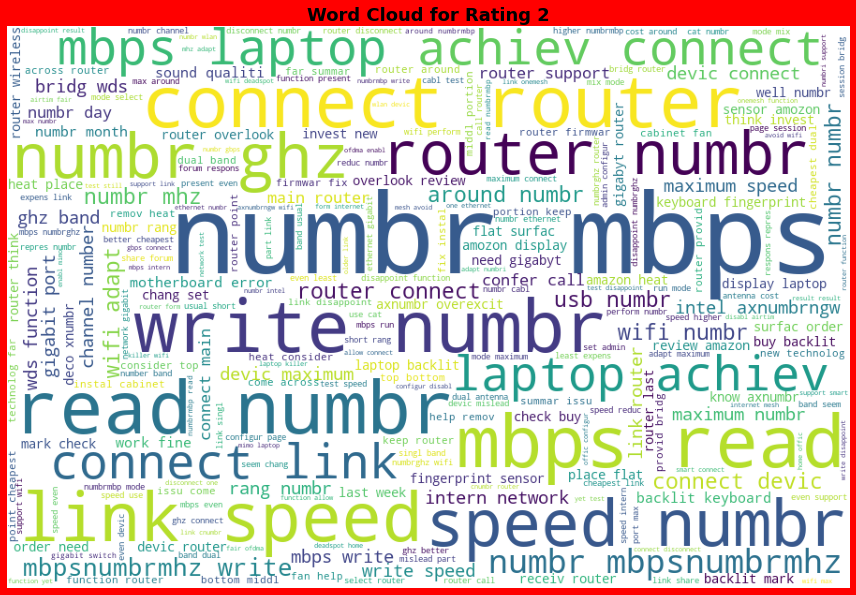

In [28]:
#Getting sense of words in Rating 2
one = data['Review'][data['Rattings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

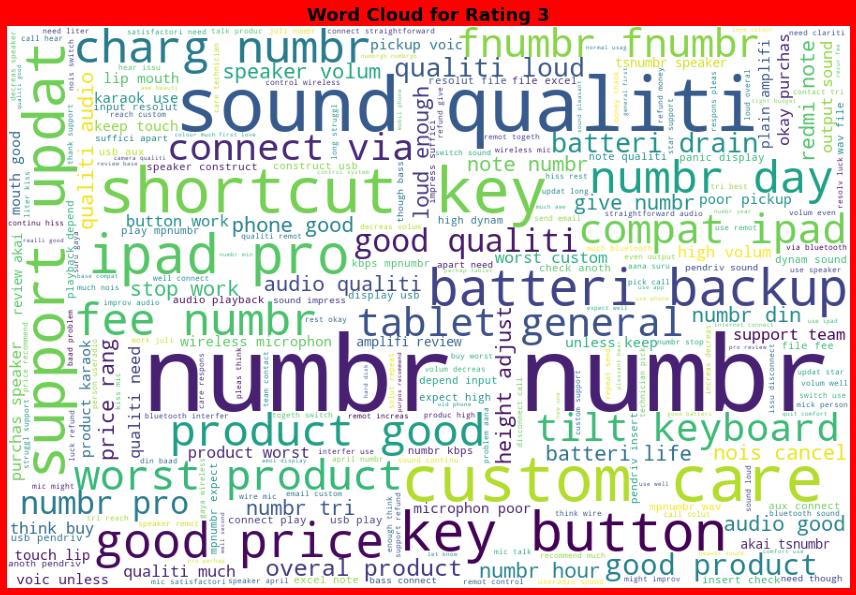

In [29]:
#Getting sense of words in Rating 3
one = data['Review'][data['Rattings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

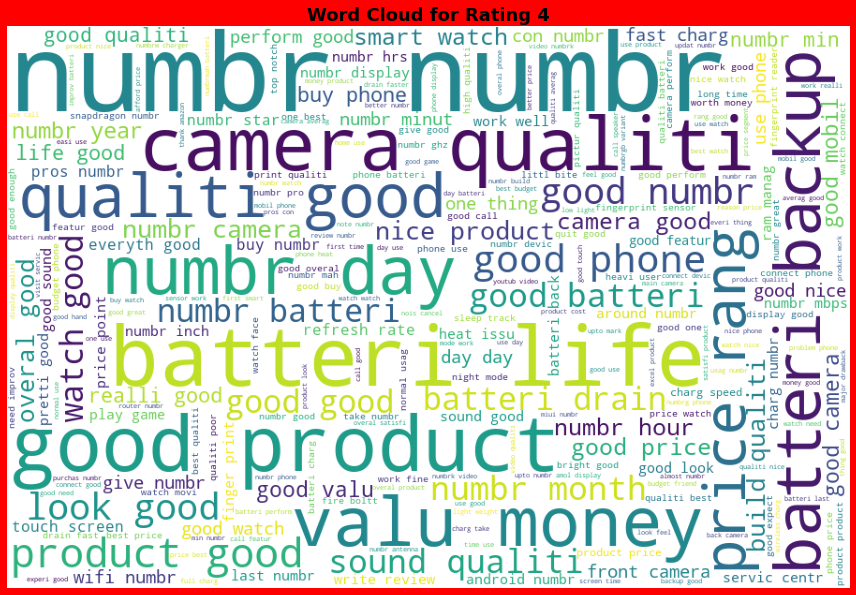

In [30]:
#Getting sense of words in Rating 4
one = data['Review'][data['Rattings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

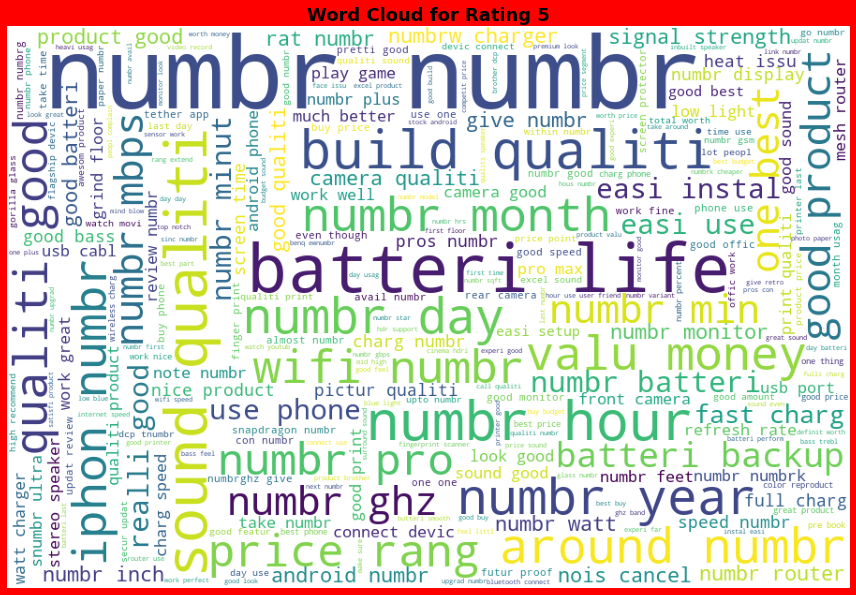

In [31]:
# Getting sense of words in Rating 5
one = data['Review'][data['Rattings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

# Text Vectorization to convert text into numeric

In [34]:
# Converting text into numeric using TfidataVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(data['Review'])
X=features
Y=data[['Rattings']]
print(X.shape)

print(Y.shape)

(42080, 7855)
(42080, 1)


# Statistical Data

In [32]:
data.describe()

,Rattings
count,42080.000000
mean,4.032700
std,0.812621
min,1.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


# Machine Learning Model Building

In [35]:
#Importing Machine learning Model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (29456, 7855)
Training target vector size: (29456, 1)
Test feature matrix size: (12624, 7855)
Test target vector size: (12624, 1)


In [36]:
# Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9308460076045627 on Random_state 60


# Logistics Regression Evaluation

In [37]:
# Logistics Regression
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69, test_size=.3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9247465145754119


Confusion matrix of Logistics Regression : 
 [[ 385    0    0   69    8]
 [   2   81    6   32   10]
 [   0    0  578  148   26]
 [   6    0    3 8276  122]
 [   0    0    1  517 2354]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.98      0.83      0.90       462
           2       1.00      0.62      0.76       131
           3       0.98      0.77      0.86       752
           4       0.92      0.98      0.95      8407
           5       0.93      0.82      0.87      2872

    accuracy                           0.92     12624
   macro avg       0.96      0.80      0.87     12624
weighted avg       0.93      0.92      0.92     12624



In [38]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.73526616 0.83044202 0.72362167 0.73455323 0.48752376]
Mean CV Score : 0.7022813688212928
Std deviation : 0.114132255003403


# Decision Tree Classifier

In [39]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9613434727503168


Confusion matrix of Decision Tree Classifier : 
 [[ 446    0    0   15    1]
 [   3  120    1    4    3]
 [   7    1  678   52   14]
 [   8    2   10 8333   54]
 [   8    2    5  298 2559]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.94      0.97      0.96       462
           2       0.96      0.92      0.94       131
           3       0.98      0.90      0.94       752
           4       0.96      0.99      0.97      8407
           5       0.97      0.89      0.93      2872

    accuracy                           0.96     12624
   macro avg       0.96      0.93      0.95     12624
weighted avg       0.96      0.96      0.96     12624



In [40]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dt, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dt, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.75712928 0.8549192  0.75297053 0.75154468 0.48479087]
Mean CV Score : 0.7202709125475285
Std deviation : 0.12408614956286175


# Random Forest Classifier

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9631653992395437


Confusion matrix of Random Forest Classifier : 
 [[ 442    0    0   20    0]
 [   0  120    0   11    0]
 [   3    0  676   68    5]
 [   1    0    0 8384   22]
 [   4    0    0  331 2537]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97       462
           2       1.00      0.92      0.96       131
           3       1.00      0.90      0.95       752
           4       0.95      1.00      0.97      8407
           5       0.99      0.88      0.93      2872

    accuracy                           0.96     12624
   macro avg       0.98      0.93      0.96     12624
weighted avg       0.96      0.96      0.96     12624



In [42]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rf, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rf, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.75083175 0.86490019 0.777923   0.76271388 0.56107414]
Mean CV Score : 0.7434885931558936
Std deviation : 0.09962436361068926


# AdaBoost Classifier

In [43]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
y_pred=ad.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.6864702154626109


Confusion matrix of AdaBoost Classifier : 
 [[ 161    4    1  295    1]
 [   0   52    9   59   11]
 [  41    1   42  652   16]
 [  29    1    4 8191  182]
 [   6    0    1 2645  220]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           1       0.68      0.35      0.46       462
           2       0.90      0.40      0.55       131
           3       0.74      0.06      0.10       752
           4       0.69      0.97      0.81      8407
           5       0.51      0.08      0.13      2872

    accuracy                           0.69     12624
   macro avg       0.70      0.37      0.41     12624
weighted avg       0.66      0.69      0.60     12624



In [44]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(ad, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',ad, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.68227186 0.66730038 0.63521863 0.65636882 0.52554658]
Mean CV Score : 0.6333412547528516
Std deviation : 0.05603733103697933


# Gradient Boosting Classifier

In [45]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8613751584283904


Confusion matrix of Gradient Boosting Classifier : 
 [[ 357    0    0  105    0]
 [   1  120    0   10    0]
 [   0    0  419  290   43]
 [   0    3    1 8371   32]
 [   0    1    3 1261 1607]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           1       1.00      0.77      0.87       462
           2       0.97      0.92      0.94       131
           3       0.99      0.56      0.71       752
           4       0.83      1.00      0.91      8407
           5       0.96      0.56      0.71      2872

    accuracy                           0.86     12624
   macro avg       0.95      0.76      0.83     12624
weighted avg       0.88      0.86      0.85     12624



In [46]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(gbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', gbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.70389734 0.74584125 0.72219582 0.74287072 0.53125   ]
Mean CV Score : 0.6892110266159696
Std deviation : 0.08042601047742602


- We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}

In [48]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)

In [49]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.960 total time=  43.7s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.964 total time=  44.8s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.965 total time=  40.6s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.959 total time=  40.5s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.961 total time=  40.3s
[CV 1/5; 2/12] STAR

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [50]:
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 75}

# Final Model

In [51]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 75,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9626901140684411


Confusion matrix of Random Forest Classifier : 
 [[ 443    0    0   18    1]
 [   0  120    0   11    0]
 [   3    0  676   68    5]
 [   2    0    0 8376   29]
 [   4    0    0  330 2538]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97       462
           2       1.00      0.92      0.96       131
           3       1.00      0.90      0.95       752
           4       0.95      1.00      0.97      8407
           5       0.99      0.88      0.93      2872

    accuracy                           0.96     12624
   macro avg       0.98      0.93      0.96     12624
weighted avg       0.96      0.96      0.96     12624



In [52]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(Final_mod, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', Final_mod, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier(criterion='entropy', n_estimators=75) :

CVScore : [0.75106939 0.86371198 0.78624049 0.76152567 0.59339354]
Mean CV Score : 0.7511882129277566
Std deviation : 0.0882001100027773


In [53]:
# Saving model
import joblib
joblib.dump(Final_mod,'Review_Rating_Prediction.pkl')
['Review_Rating_Prediction.pkl']

['Review_Rating_Prediction.pkl']